In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline  

In [2]:
from sklearn.decomposition import PCA

In [3]:
def f(x):
   if x=='True':
       return 1
   elif x=='False':
       return 0
   else: return x

In [4]:
data_path = '../EarthEngine/'

In [59]:
earthEngineSurveydf = pd.read_csv(data_path + 'RustSurvey+EarthEngine.csv', index_col=0)
earthEngineSurveydf.shape
earthEngineSurveydf = earthEngineSurveydf.applymap(lambda x:f(x))

In [7]:
data = earthEngineSurveydf[range(41, earthEngineSurveydf.shape[1] )]

In [142]:
#X=X.fillna(X.mean(0))

In [143]:
#X.iloc[:,:50].describe()

In [8]:
X = data
X = X.fillna(X.mean(0))
X = X._get_numeric_data()

(7726,)


(7726, 844)

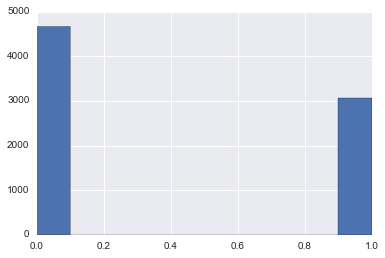

In [13]:
y = earthEngineSurveydf['StemRust.Binary']
y = y.replace([False, True], [0,1])
y.dropna(inplace=True)
y.hist()
print y.shape

X = X.ix[y.index] #getting ys from which we have X for
X.shape



In [64]:
print X.shape
n_components = 100
pca = PCA(n_components=n_components)
X_r = pca.fit(X).transform(X)
print X_r.shape
print X_r

X_r_df = pd.DataFrame(data=X_r, index=X.index)
X_r_df.rename(columns = lambda x : 'pca_' + str(x), inplace=True)
print X_r_df.head()

(7726, 844)
(7726, 100)
[[  3.66055996e+03  -2.52167132e+04   1.59756190e+03 ...,   3.62998147e+02
   -1.14279778e+02   3.20890847e+02]
 [  1.27009658e+04  -1.61651515e+04  -1.10165268e+03 ...,   8.25917466e+01
    4.02440366e+02   6.57196022e+02]
 [  6.62410580e+03  -2.11783819e+04  -6.74434995e+02 ...,   1.84932360e+01
   -3.08603111e+02   4.05861649e+02]
 ..., 
 [  1.16758237e+04  -5.29367073e+03  -1.04705085e+04 ...,   7.03152685e+02
    2.12857509e+02  -6.32050832e+02]
 [ -9.33683222e+01  -1.08984670e+04   2.91200433e+03 ...,   7.30612691e+02
   -1.55346184e+02  -5.67865456e+02]
 [  3.57654533e+03  -1.70034059e+04  -2.83329380e+03 ...,   2.58207619e+01
    5.78240238e+02  -2.13822009e+02]]
                    pca_0         pca_1        pca_2        pca_3  \
Location.ID                                                         
43374         3660.559962 -25216.713200  1597.561902 -5799.397157   
43375        12700.965753 -16165.151517 -1101.652682 -9086.839311   
43376         6624.1

In [57]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred_lda = lda.fit(X, y.as_matrix()).predict(X)
X_r2 = lda.fit_transform(X, y)
print y_pred_lda.shape
X_r2_df = pd.DataFrame(data=X_r2, index=X.index)
print X_r2_df.head()
lda_score = lda.score(X=X, y=y)
print lda_score

(7726,)
                    0
Location.ID          
43374       -0.636905
43375        0.511489
43376       -0.475069
43377       -0.635807
43378        0.050557
0.844162567952


In [42]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.21497282  0.17569145  0.11981241  0.10618548]


In [65]:
merged = X_r_df.copy()
merged['StemRust.Binary'] = y
print merged.shape
print merged.head()

merged.to_csv('pca_transformed_%s.csv'%n_components)

(7726, 101)
                    pca_0         pca_1        pca_2        pca_3  \
Location.ID                                                         
43374         3660.559962 -25216.713200  1597.561902 -5799.397157   
43375        12700.965753 -16165.151517 -1101.652682 -9086.839311   
43376         6624.105799 -21178.381863  -674.434995 -1215.191550   
43377         7794.661500 -20167.650990  -700.708863 -4593.134574   
43378        12447.480974 -16467.457348  -976.762279 -9467.375672   

                   pca_4         pca_5         pca_6        pca_7  \
Location.ID                                                         
43374       -5872.862394  25517.261396  11494.957851     1.109379   
43375       -9839.896399  29020.423553   7287.503780 -1198.197685   
43376       -9476.992975  28608.532225   7119.379981 -1007.781390   
43377       -9931.492781  28723.056082   7136.569405 -1442.819366   
43378       -9986.451805  29142.453189   7342.265387 -1406.182082   

                   p

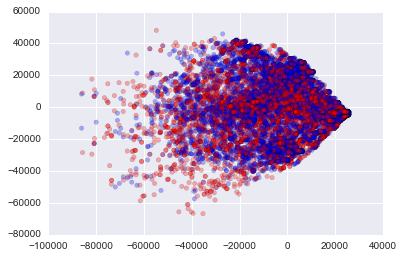

In [45]:
colors = merged['StemRust.Binary'].replace([0,1], ['blue','red'])
plt.scatter(x=merged.pca_0, y=merged.pca_1, c=colors, alpha=0.3)

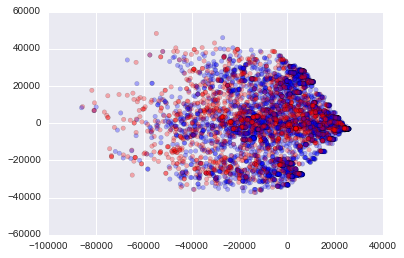

In [46]:
plt.scatter(x=merged.pca_0, y=merged.pca_2, c=colors, alpha=0.3)

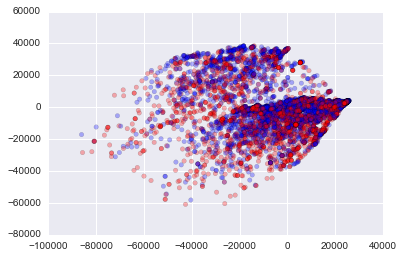

In [47]:
plt.scatter(x=merged.pca_0, y=merged.pca_3, c=colors, alpha=0.3)

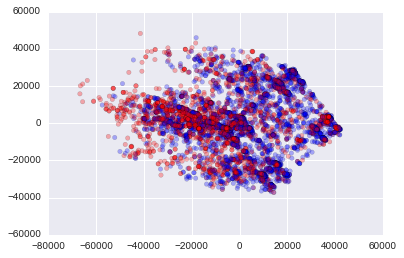

In [48]:
plt.scatter(x=merged.pca_1, y=merged.pca_2, c=colors, alpha=0.3)